#Crar carpeta para las imagenes

In [ ]:
#Entrar en cada carpeta y descomprimir el archivo zip
!unzip /content/train_image.zip
!unzip /content/train-jpg-escalado.zip

In [5]:
#Borrar los archivo ZIP
!rm -rf /content/train_image.zip
!rm -rf /content/train-jpg-escalado.zip

In [7]:
#Mostrar cuantas imagenes tengo
!ls /content/train-jpg-e | wc -l 
!ls /content/content/dataset_augmented | wc -l 

40479
121536


#Imports

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import random

#Cargar datos

In [2]:
total_entrenamiento = 30384 
total_val = 8095 
total_test = 2000

In [3]:
from numpy.random.mtrand import random_integers
x_train = []
x_val = []
for i in range(total_entrenamiento + total_val) :
  if i < total_entrenamiento : 
    path = '/content/content/dataset_augmented/train_'+str(i)
    image = cv2.imread(path+'_e.jpg') / 255
    x_train.append(image)
    n = random.randint(0,2)
    if n == 0:
      image = cv2.imread(path+'_ehf.jpg') / 255
      x_train.append(image)
    elif n == 1:
      image = cv2.imread(path+'_evf.jpg') / 255
      x_train.append(image)
    else:
      image = cv2.imread(path+'_edf.jpg') / 255
      x_train.append(image)
  else : 
    path = '/content/train-jpg-e/train_'+str(i)
    image = cv2.imread(path+'_e.jpg') / 255
    x_val.append(image)

In [4]:
x_train = np.array(x_train)
x_val = np.array(x_val)

In [5]:
print(x_train.shape)
print(x_val.shape)

(60768, 50, 50, 3)
(8095, 50, 50, 3)


In [6]:
y = pd.read_csv('tags_deforestation.csv')
y_train = []
for i in range(total_entrenamiento):
  y_train.append(y.deforestation.values[i])
  y_train.append(y.deforestation.values[i])


y_val = y.deforestation.values[total_entrenamiento:total_entrenamiento+total_val]
y_test = y.deforestation.values[total_entrenamiento+total_val:]

In [9]:
print(np.sum(y_train)/(total_entrenamiento*2))
print(np.sum(y_val)/total_val)
print(np.sum(y_test)/total_test)

0.21517904160084256
0.21260037059913528
0.219


In [7]:
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [13]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(60768, 1)
(8095, 1)
(2000, 1)


#crear modelo convolucional con dropout 0.7

In [18]:
modelo = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##Entrenar modelo

In [19]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
#Entrenar el modelo
EPOCAS = 25
historial = modelo.fit(
    x_train,
    y_train, 
      epochs=EPOCAS, 
      batch_size=16,
      validation_data=(x_val,y_val)
)

Epoch 1/25
3798/3798 [==============================] - 24s 4ms/step - loss: 0.4078 - accuracy: 0.8170 - val_loss: 0.5590 - val_accuracy: 0.7910
Epoch 2/25
3798/3798 [==============================] - 16s 4ms/step - loss: 0.3522 - accuracy: 0.8449 - val_loss: 0.4235 - val_accuracy: 0.8224
Epoch 3/25
3798/3798 [==============================] - 15s 4ms/step - loss: 0.3337 - accuracy: 0.8551 - val_loss: 0.4633 - val_accuracy: 0.8083
Epoch 4/25
3798/3798 [==============================] - 16s 4ms/step - loss: 0.3254 - accuracy: 0.8578 - val_loss: 0.4810 - val_accuracy: 0.8041
Epoch 5/25
3798/3798 [==============================] - 16s 4ms/step - loss: 0.3182 - accuracy: 0.8634 - val_loss: 0.5210 - val_accuracy: 0.7963
Epoch 6/25
3798/3798 [==============================] - 15s 4ms/step - loss: 0.3138 - accuracy: 0.8644 - val_loss: 0.4749 - val_accuracy: 0.8021
Epoch 7/25
3798/3798 [==============================] - 15s 4ms/step - loss: 0.3116 - accuracy: 0.8676 - val_loss: 0.7747 - val_ac

##Evaluación

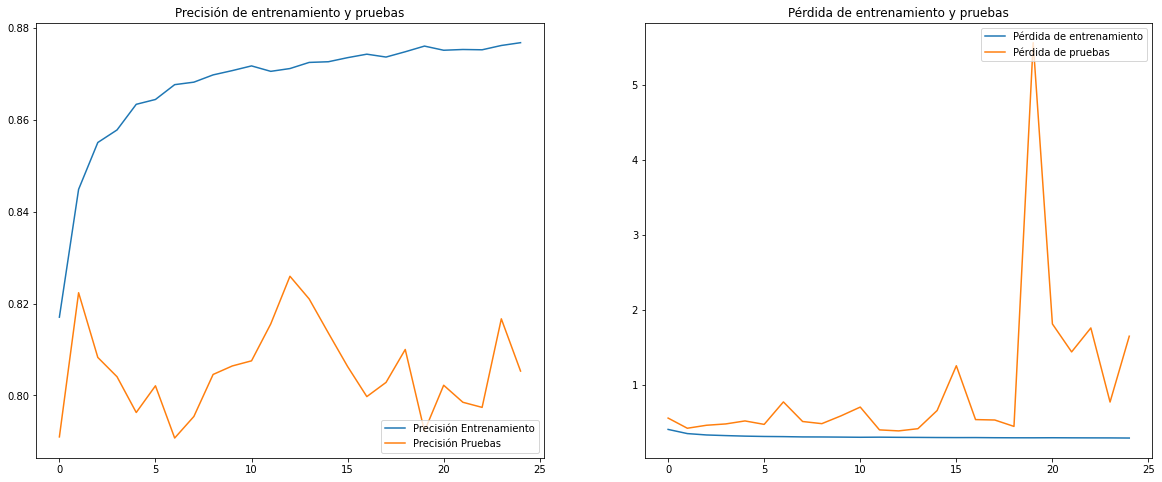

In [21]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

#crear modelo convolucional con dropout 0.8

In [8]:
modelo = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##Entrenar modelo

In [15]:
#Compilar como siempre
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.01,
),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
#Entrenar el modelo
EPOCAS = 25
historial = modelo.fit(
    x_train,
    y_train, 
      epochs=EPOCAS, 
      batch_size=16,
      validation_data=(x_val,y_val)
)

Epoch 1/25
3798/3798 [==============================] - 19s 5ms/step - loss: 0.4101 - accuracy: 0.8196 - val_loss: 0.5277 - val_accuracy: 0.7907
Epoch 2/25
3798/3798 [==============================] - 17s 4ms/step - loss: 0.4137 - accuracy: 0.8191 - val_loss: 0.4987 - val_accuracy: 0.7921
Epoch 3/25
3798/3798 [==============================] - 16s 4ms/step - loss: 0.4269 - accuracy: 0.8179 - val_loss: 0.5185 - val_accuracy: 0.7896
Epoch 4/25
3798/3798 [==============================] - 17s 5ms/step - loss: 0.4792 - accuracy: 0.7989 - val_loss: 0.5180 - val_accuracy: 0.7874
Epoch 5/25
3798/3798 [==============================] - 16s 4ms/step - loss: 0.5219 - accuracy: 0.7848 - val_loss: 0.5165 - val_accuracy: 0.7874
Epoch 6/25
3798/3798 [==============================] - 17s 4ms/step - loss: 0.5216 - accuracy: 0.7848 - val_loss: 0.5187 - val_accuracy: 0.7874
Epoch 7/25
3798/3798 [==============================] - 19s 5ms/step - loss: 0.5214 - accuracy: 0.7848 - val_loss: 0.5206 - val_ac

##Evaluación

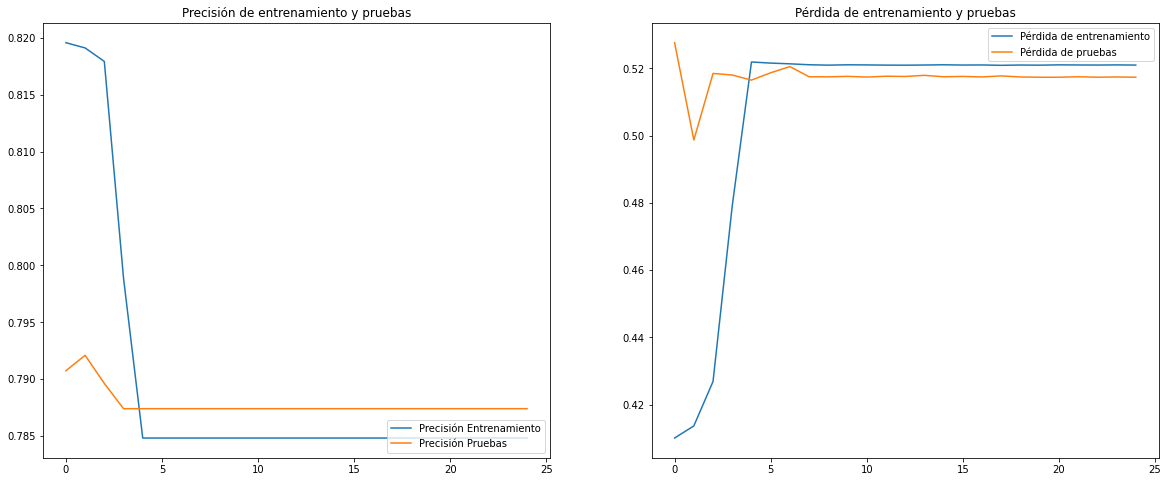

In [17]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

#crear modelo convolucional con dropout 0.7 optimizer rmsprop

In [ ]:
modelo = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##Entrenar modelo

In [ ]:
#Compilar como siempre
modelo.compile(
    optimizer='rmsprop',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50
historial = modelo.fit(
    x_train,
    y_train, 
      epochs=EPOCAS, 
      batch_size=32,
      validation_data=(x_val,y_val)
)

Epoch 1/50
950/950 [==============================] - 7s 7ms/step - loss: 0.4406 - accuracy: 0.8084 - val_loss: 0.6089 - val_accuracy: 0.7928
Epoch 2/50
950/950 [==============================] - 6s 7ms/step - loss: 0.3900 - accuracy: 0.8343 - val_loss: 0.6080 - val_accuracy: 0.6910
Epoch 3/50
950/950 [==============================] - 6s 6ms/step - loss: 0.3741 - accuracy: 0.8449 - val_loss: 0.3607 - val_accuracy: 0.8553
Epoch 4/50
950/950 [==============================] - 6s 7ms/step - loss: 0.3654 - accuracy: 0.8494 - val_loss: 0.3461 - val_accuracy: 0.8531
Epoch 5/50
950/950 [==============================] - 6s 6ms/step - loss: 0.3569 - accuracy: 0.8534 - val_loss: 0.3651 - val_accuracy: 0.8589
Epoch 6/50
950/950 [==============================] - 7s 7ms/step - loss: 0.3535 - accuracy: 0.8566 - val_loss: 0.4013 - val_accuracy: 0.8382
Epoch 7/50
950/950 [==============================] - 6s 6ms/step - loss: 0.3565 - accuracy: 0.8539 - val_loss: 0.3585 - val_accuracy: 0.8563
Epoch 

##Evaluación

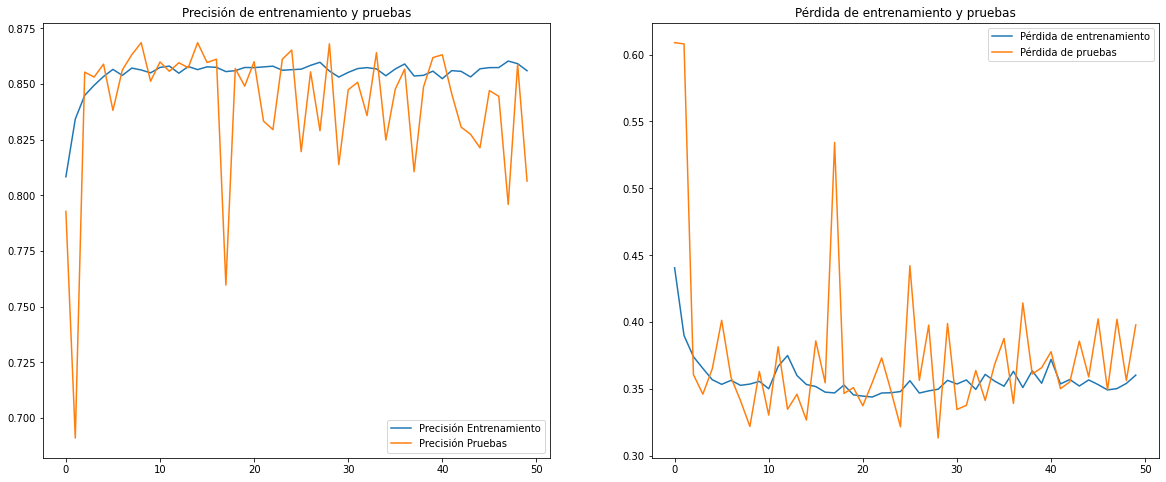

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

#crear modelo convolucional con dropout 0.7 optimizer adamax

In [ ]:
modelo = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##Entrenar modelo

In [ ]:
#Compilar como siempre

modelo.compile(
    optimizer='adamax',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50
historial = modelo.fit(
    x_train,
    y_train, 
      epochs=EPOCAS, 
      batch_size=32,
      validation_data=(x_val,y_val)
)

Epoch 1/50
950/950 [==============================] - 8s 7ms/step - loss: 0.4308 - accuracy: 0.8069 - val_loss: 0.3896 - val_accuracy: 0.8258
Epoch 2/50
950/950 [==============================] - 6s 7ms/step - loss: 0.3778 - accuracy: 0.8325 - val_loss: 0.3706 - val_accuracy: 0.8430
Epoch 3/50
950/950 [==============================] - 6s 6ms/step - loss: 0.3542 - accuracy: 0.8473 - val_loss: 0.3403 - val_accuracy: 0.8550
Epoch 4/50
950/950 [==============================] - 6s 6ms/step - loss: 0.3381 - accuracy: 0.8547 - val_loss: 0.3366 - val_accuracy: 0.8586
Epoch 5/50
950/950 [==============================] - 6s 6ms/step - loss: 0.3287 - accuracy: 0.8593 - val_loss: 0.3237 - val_accuracy: 0.8636
Epoch 6/50
950/950 [==============================] - 6s 6ms/step - loss: 0.3212 - accuracy: 0.8624 - val_loss: 0.3181 - val_accuracy: 0.8686
Epoch 7/50
950/950 [==============================] - 6s 7ms/step - loss: 0.3137 - accuracy: 0.8671 - val_loss: 0.3131 - val_accuracy: 0.8704
Epoch 

##Evaluación

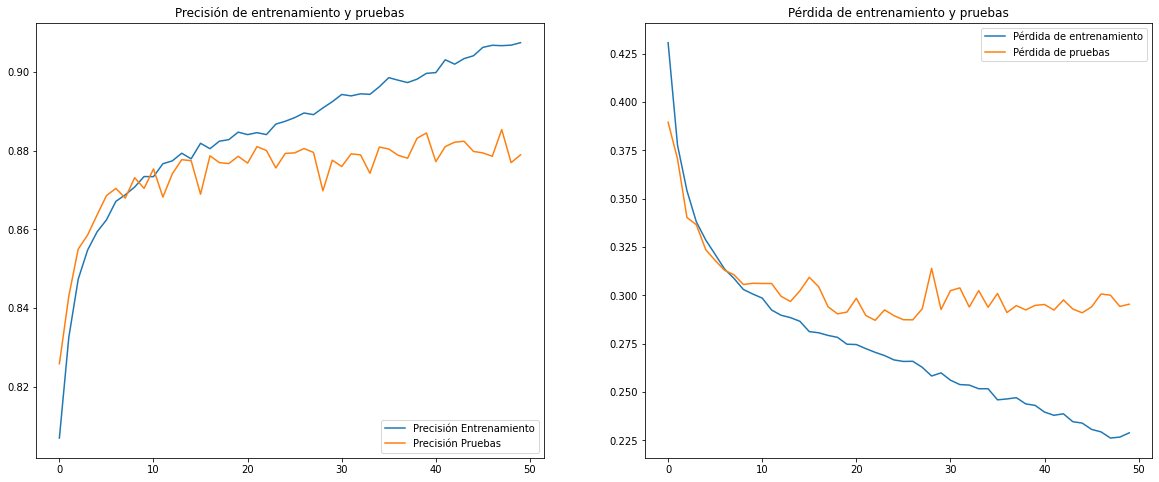

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

#crear modelo convolucional con dropout 0.7 optimizer SGD

In [ ]:
modelo = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##Entrenar modelo

In [ ]:
#Compilar como siempre
sgd = tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    name='SGD'
)
modelo.compile(
    optimizer=sgd,
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50
historial = modelo.fit(
    x_train,
    y_train, 
      epochs=EPOCAS, 
      batch_size=32,
      validation_data=(x_val,y_val)
)

Epoch 1/50
950/950 [==============================] - 7s 7ms/step - loss: 0.5222 - accuracy: 0.7807 - val_loss: 0.4793 - val_accuracy: 0.7833
Epoch 2/50
950/950 [==============================] - 6s 6ms/step - loss: 0.4572 - accuracy: 0.7930 - val_loss: 0.4554 - val_accuracy: 0.8031
Epoch 3/50
950/950 [==============================] - 6s 6ms/step - loss: 0.4351 - accuracy: 0.8044 - val_loss: 0.4391 - val_accuracy: 0.8098
Epoch 4/50
950/950 [==============================] - 6s 6ms/step - loss: 0.4232 - accuracy: 0.8102 - val_loss: 0.4188 - val_accuracy: 0.8180
Epoch 5/50
950/950 [==============================] - 6s 6ms/step - loss: 0.4163 - accuracy: 0.8137 - val_loss: 0.4497 - val_accuracy: 0.7758
Epoch 6/50
950/950 [==============================] - 7s 7ms/step - loss: 0.4089 - accuracy: 0.8170 - val_loss: 0.5001 - val_accuracy: 0.7239
Epoch 7/50
950/950 [==============================] - 6s 6ms/step - loss: 0.4034 - accuracy: 0.8210 - val_loss: 0.4051 - val_accuracy: 0.8248
Epoch 

##Evaluación

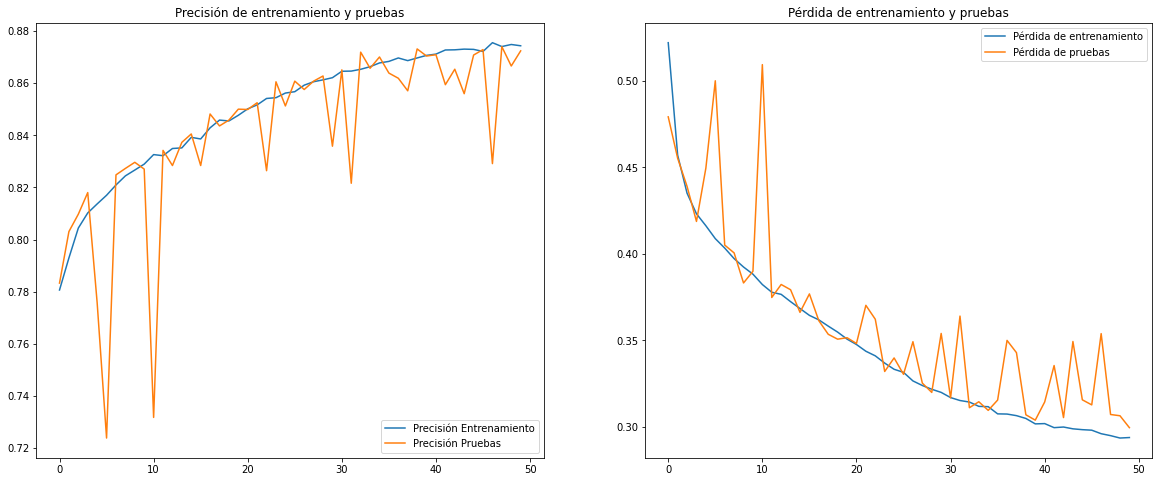

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

#crear modelo convolucional con dropout 0.7 optimizer SGD batch 16

In [ ]:
modelo = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##Entrenar modelo

In [ ]:
#Compilar como siempre
sgd = tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    name='SGD'
)
modelo.compile(
    optimizer=sgd,
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50
historial = modelo.fit(
    x_train,
    y_train, 
      epochs=EPOCAS, 
      batch_size=16,
      validation_data=(x_val,y_val)
)

Epoch 1/50
1899/1899 [==============================] - 9s 4ms/step - loss: 0.4919 - accuracy: 0.7867 - val_loss: 0.4447 - val_accuracy: 0.8020
Epoch 2/50
1899/1899 [==============================] - 8s 4ms/step - loss: 0.4437 - accuracy: 0.7987 - val_loss: 0.4257 - val_accuracy: 0.8079
Epoch 3/50
1899/1899 [==============================] - 8s 4ms/step - loss: 0.4280 - accuracy: 0.8070 - val_loss: 0.4141 - val_accuracy: 0.8080
Epoch 4/50
1899/1899 [==============================] - 8s 4ms/step - loss: 0.4177 - accuracy: 0.8093 - val_loss: 0.4082 - val_accuracy: 0.8152
Epoch 5/50
1899/1899 [==============================] - 8s 4ms/step - loss: 0.4051 - accuracy: 0.8177 - val_loss: 0.3977 - val_accuracy: 0.8182
Epoch 6/50
1899/1899 [==============================] - 8s 4ms/step - loss: 0.3976 - accuracy: 0.8215 - val_loss: 0.3902 - val_accuracy: 0.8295
Epoch 7/50
1899/1899 [==============================] - 9s 5ms/step - loss: 0.3913 - accuracy: 0.8268 - val_loss: 0.3862 - val_accuracy:

##Evaluación

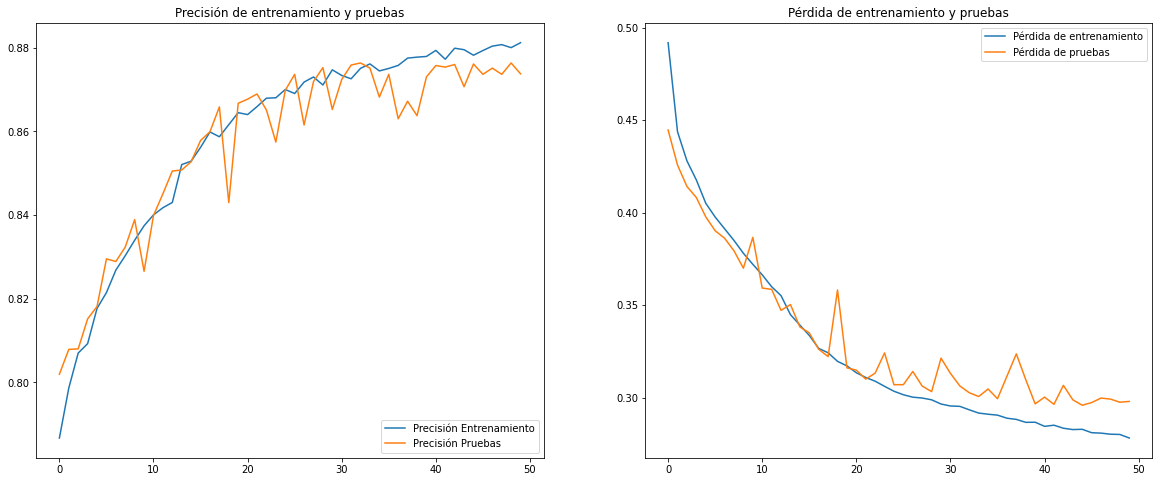

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

#crear modelo convolucional con dropout 0.7 optimizer SGD batch 16

In [ ]:
modelo = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##Entrenar modelo

In [ ]:
#Compilar como siempre
sgd = tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    name='SGD'
)
modelo.compile(
    optimizer=sgd,
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50
historial = modelo.fit(
    x_train,
    y_train, 
      epochs=EPOCAS, 
      batch_size=8,
      validation_data=(x_val,y_val)
)

Epoch 1/50
3798/3798 [==============================] - 17s 4ms/step - loss: 0.4721 - accuracy: 0.7908 - val_loss: 0.4255 - val_accuracy: 0.8089
Epoch 2/50
3798/3798 [==============================] - 16s 4ms/step - loss: 0.4250 - accuracy: 0.8074 - val_loss: 0.4493 - val_accuracy: 0.7874
Epoch 3/50
3798/3798 [==============================] - 17s 4ms/step - loss: 0.4083 - accuracy: 0.8136 - val_loss: 0.4023 - val_accuracy: 0.8226
Epoch 4/50
3798/3798 [==============================] - 16s 4ms/step - loss: 0.3932 - accuracy: 0.8219 - val_loss: 0.3954 - val_accuracy: 0.8280
Epoch 5/50
3798/3798 [==============================] - 16s 4ms/step - loss: 0.3819 - accuracy: 0.8275 - val_loss: 0.3837 - val_accuracy: 0.8209
Epoch 6/50
3798/3798 [==============================] - 16s 4ms/step - loss: 0.3700 - accuracy: 0.8345 - val_loss: 0.3990 - val_accuracy: 0.8125
Epoch 7/50
3798/3798 [==============================] - 16s 4ms/step - loss: 0.3596 - accuracy: 0.8367 - val_loss: 0.3639 - val_ac

##Evaluación

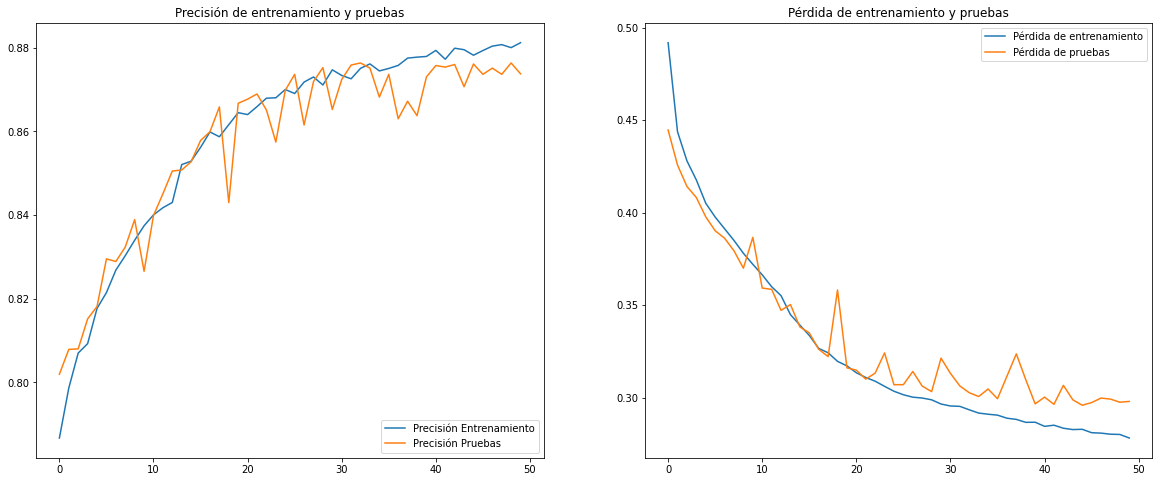

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

# La mejor arquitectura es usando redes convolucionales y dropout
Además de que sin importar el batch todos tienen 87.xx de accuracy, la diferencia es en que epoca llegan a la mejor versión, pareciendo que un batch de 32 es la mejor opción.